   metro  precio
0      5     375
1     15     487
2     20     450
3     25     500


array([[<Axes: title={'center': 'metro'}>,
        <Axes: title={'center': 'precio'}>]], dtype=object)

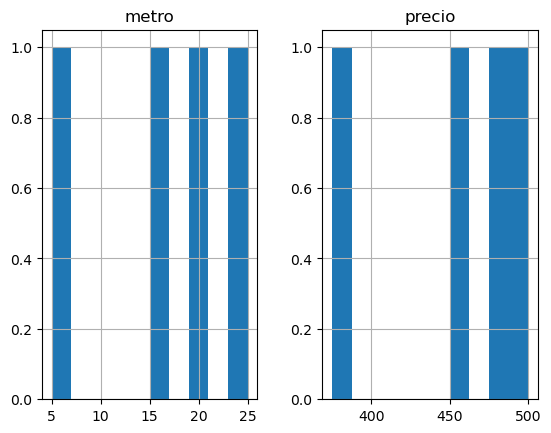

In [252]:
import pandas as pd
#graficos informativos y estadisticos con mejor diseño
import seaborn as sns
#funciones matematicas , algebraicas, vectores y matrices
import numpy as np
#genera diversos tipos de graficos
import matplotlib.pyplot as plt
# %matplotlib inline
#from sklearn.linear_model import LinearRegression   # saber valores optimos
from sklearn import linear_model 
import datetime

#plt.show()
datos= pd.read_csv ("data.csv",sep=",") # lee un archivo separado por comas (,)
print(datos)
datos.hist()

OPCION 1 GRAFICA


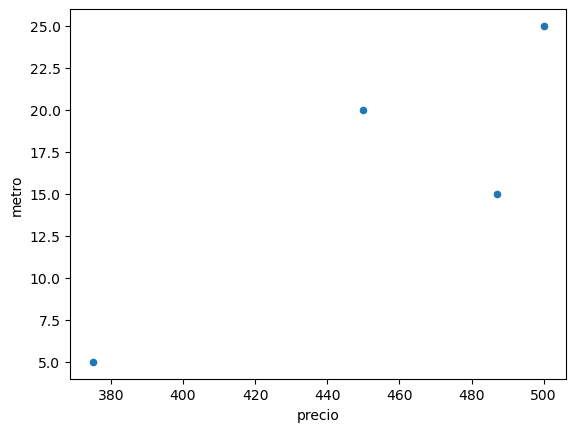

Interseccion (b) -42.901511947557616
Pendiente (m) [0.13057729]
[ 6.06497145 20.68962783 15.85826813 22.38713259]


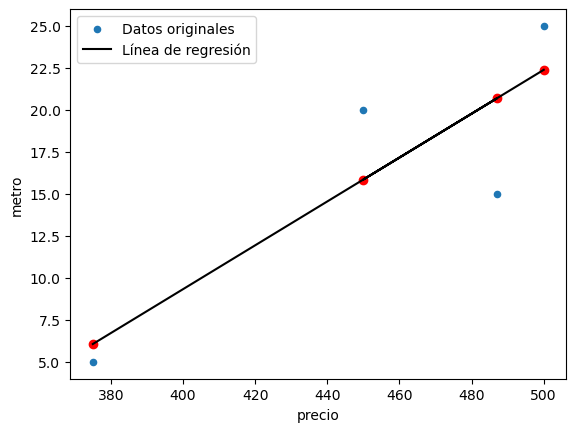

In [253]:
print("OPCION 1 GRAFICA")
#Realizo la grafica de dispersión
datos.plot.scatter(x="precio", y="metro")
plt.show()
regresion = linear_model.LinearRegression()
#Agrego los datos en un array o vector
nprecio=datos['precio'].values.reshape(-1,1)
#nmetro =datos['metro'].values.reshape(-1,1)
#Ahora si creamos el modelo
modelo = regresion.fit(nprecio, datos["metro"])
print("Interseccion (b)", modelo.intercept_)
#imprimos la pendiente
print("Pendiente (m)", modelo.coef_)
entrada= [[375],[487],[450],[500]]
predicciones = modelo.predict(entrada)
print(predicciones)

datos.plot.scatter(x="precio", y="metro", label='Datos originales')
plt.scatter(entrada, predicciones, color='red')
plt.plot(entrada, predicciones, color='black', label='Línea de regresión')
plt.xlabel('precio')
plt.ylabel('metro')
plt.legend()
plt.show()


OPCION 2 GRAFICA
5.645714285714275 361.25714285714304


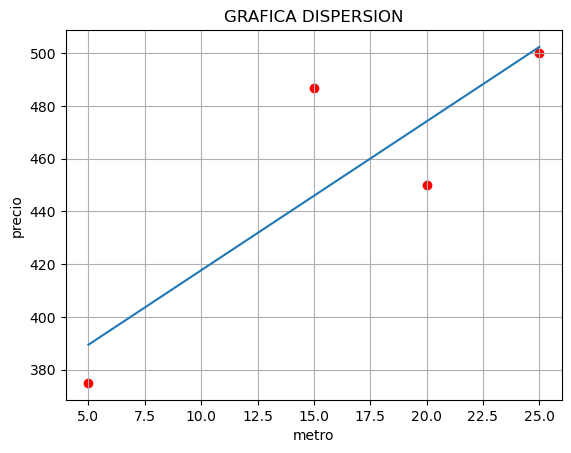

In [254]:
print("OPCION 2 GRAFICA")
train= pd.read_csv ("data.csv",sep=",") # lee un archivo separado por comas (,)
# parametros de la recta
datos.head(1)

pend, ordenada = np.polyfit(train["metro"],train["precio"],1)
print(pend,ordenada)



plt.scatter(train["metro"],train["precio"],c="red") # eje x es metro
plt.plot(train["metro"],ordenada+pend*train["metro"])
plt.title("GRAFICA DISPERSION")
plt.xlabel("metro")
plt.ylabel("precio")
plt.grid()
plt.savefig("Grafica_Dispersion")
plt.show()

In [255]:
# promedio metro
metro=datos["metro"]
print(np.mean(metro))

# promedio precio
precio=datos["precio"]
np.mean(precio)

16.25


453.0

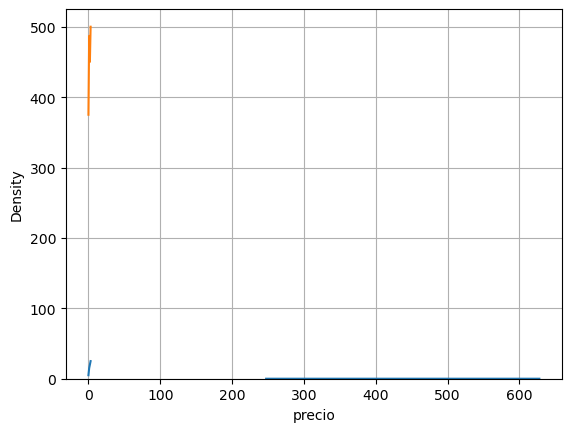

In [256]:
import seaborn as sns
import io
import requests


#sns.histplot(data=datos, x="precio")
sns.histplot(datos['precio'],kde=True,
    stat="density", kde_kws=dict(cut=3))

plt.grid(True)
plt.plot(datos)

In [257]:
### importamos las librerias que vamos a utlizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [258]:
#ETAPA 5
datos.head()

,metro,precio
0,5,375
1,15,487
2,20,450
3,25,500


In [284]:
base = datos[['metro','precio']]

### añadimos mas valores al dataframe
#base = base.append(pd.Series(['30','550'], index=['metro','precio']), ignore_index=True)

base = base.append({'metro': 35,'precio': 650}, ignore_index=True)
base = base.append({'metro': 40,'precio': 700}, ignore_index=True)
base = base.append({'metro': 45,'precio': 715}, ignore_index=True)
base = base.append({'metro': 50,'precio': 750}, ignore_index=True)
base = base.append({'metro': 35,'precio': 650}, ignore_index=True)
base = base.append({'metro': 40,'precio': 700}, ignore_index=True)
base = base.append({'metro': 45,'precio': 715}, ignore_index=True)
base = base.append({'metro': 50,'precio': 750}, ignore_index=True)
base = base.append({'metro': 100,'precio': 1500}, ignore_index=True)
base = base.append({'metro': 350,'precio': 3000}, ignore_index=True)
base = base.append({'metro': 485,'precio': 4550}, ignore_index=True)
base = base.append({'metro': 721,'precio': 6235}, ignore_index=True)
base.head()
print(base)

    metro  precio
0       5     375
1      15     487
2      20     450
3      25     500
4      35     650
5      40     700
6      45     715
7      50     750
8      35     650
9      40     700
10     45     715
11     50     750
12    100    1500
13    350    3000
14    485    4550
15    721    6235


/tmp/ipykernel_243894/429787730.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append({'metro': 35,'precio': 650}, ignore_index=True)
/tmp/ipykernel_243894/429787730.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append({'metro': 40,'precio': 700}, ignore_index=True)
/tmp/ipykernel_243894/429787730.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append({'metro': 45,'precio': 715}, ignore_index=True)
/tmp/ipykernel_243894/429787730.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base = base.append({'metro': 50,'precio': 750}, ignore_index=True)
/tmp/ipykernel_243894/429787730.py:12:

In [285]:
### realizamos un  analisis descriptivo de las variables
base.describe()

,metro,precio
count,16.000000,16.00000
mean,128.812500,1420.43750
std,206.245556,1699.96443
min,5.000000,375.00000
25%,32.500000,612.50000
50%,42.500000,707.50000
75%,62.500000,937.50000
max,721.000000,6235.00000


array([[<Axes: title={'center': 'metro'}>,
        <Axes: title={'center': 'precio'}>]], dtype=object)

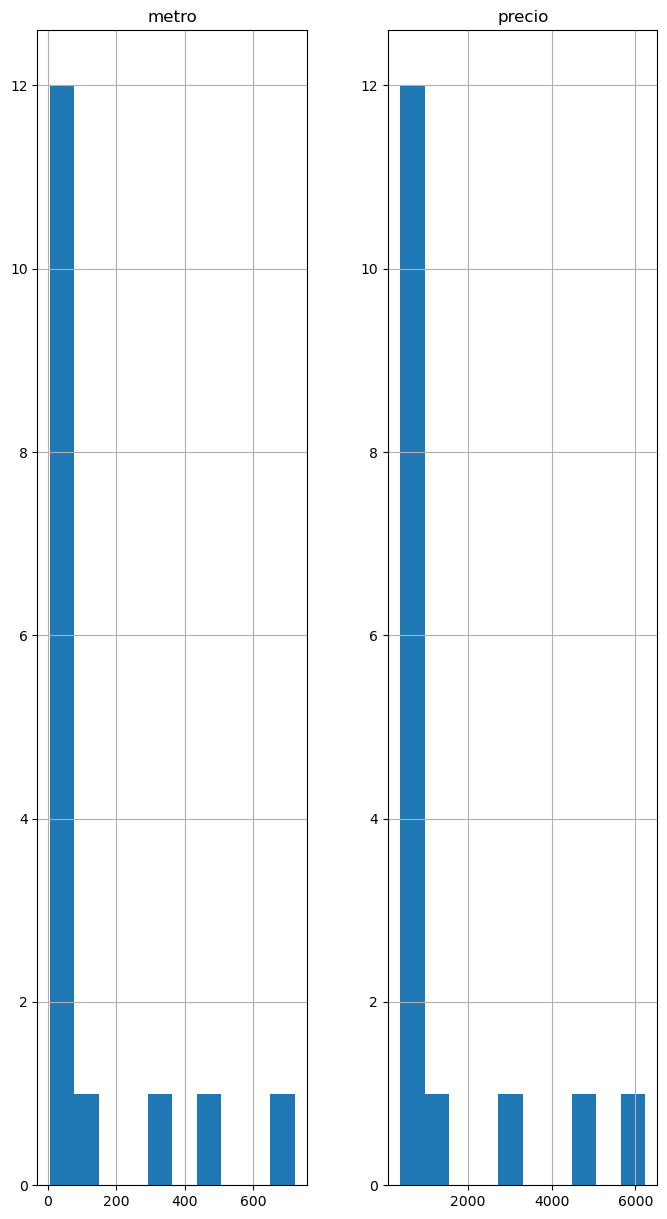

In [286]:
## creamos un grafico de estilo histograma para observar las dsitrbuciones
base.hist(figsize=(8,15))

<Axes: >

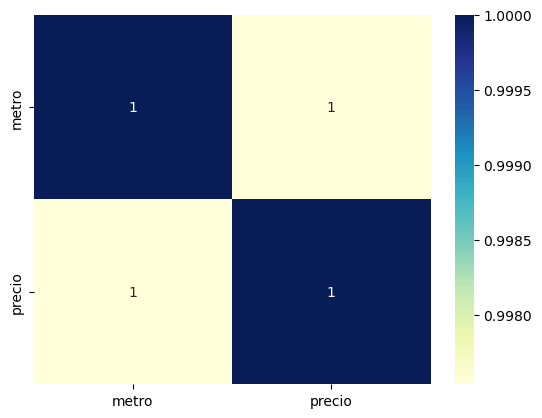

In [287]:
#### se agrega una nueva matriz de correlacion
cm=np.corrcoef(base.values.T)
sns.heatmap(cm,annot=True, xticklabels=base.columns, yticklabels=base.columns, cmap="YlGnBu")

In [288]:
###procedemos a generar el modelo de regresion lineal  utlizando la variable de  happiness score como variable de respuesta
## se seleccionan estas variables X
X=base[['metro']]
y=base[['precio']]

In [289]:
## separamos los datos indicado que el 20% seran de prueba y el 80% de entrenamiento
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [290]:
## realizamos el modelo
modelo=LinearRegression()
## entrenamos el modelo aplicando la recta
modelo.fit(X_train,y_train)

LinearRegression()

In [291]:
##realizamos predicciones con los dato de prueba
y_pred=modelo.predict(X_test)
y_pred.shape

(4, 1)

In [293]:
##generamos el coeficiente de determinación y el error cuadratico comparando los datos de prueba contra las variables
##que se estan prediciendo
mse= metrics.mean_squared_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

print("r2", r2)
print("mse", mse)

#Como resultado obtenemos un Coeficiente de determiancion de 0.881 lo que nos da entender que los valores predichos se ajustan a los datos reales, y el error cuadratico es cercano al 0 generando un buen rendiendimiento en el modelo

#exactitud
#calcula acurrancy
y_prec = base.precio
x_metros = base.metro
metrics.accuracy_score(y_prec,x_metros)
# la cual nos indica que es exacta

r2 0.980816303278333
mse 22070.97136924972


0.0

In [302]:


# se eliminaron los datos numericos y se agregaron datos boolean
#base1=base1.drop([0])
#base1=base1.drop([1])
#base1=base1.drop([2])
#base1=base1.drop([3])
#base1=base1.drop([4])
#base1=base1.drop([5])
#base1=base1.drop([6])

# CUMPLIR CONDICION
# metro => 0 aumenta en 5 
#Registro	metro	metro => metro aumenta en 5 	metro inicia en 0
#0	5	True	
#1	15	False	
#2	20	True	
#3	25	True	
#4	35	False	
#5	40	True	
#6	45	True	
#7	50	True	
#8	35	False	
#9	40	True	
#10	45	True	
#11	50	True	
#12	100	False	
#13	350	False	
#14	485	False	
#15	721	False	

#Registro	  precio	precio => precio aumenta en 50 	precio inicia en 0
#0	375	False	
#1	487	False	
#2	450	False	
#3	500	True	
#4	550	True	
#5	600	True	
#6	650	True	
#7	750	False	
#8	650	False	
#9	700	True	
#10	715	False	
#11	750	False	
#12	1500	False	
#13	3000	False	
#14	4550	False	
#15	6235	False	



#agregamos 'False', 'True'
base1 = base1.append({'metro':'True','precio':'False'}, ignore_index=True) #0
base1 = base1.append({'metro':'False','precio':'False'}, ignore_index=True)#1
base1 = base1.append({'metro':'True', 'precio':'False'}, ignore_index=True)#2
base1 = base1.append({'metro':'True','precio':'True'}, ignore_index=True)#3
base1 = base1.append({'metro':'False', 'precio':'True'}, ignore_index=True)#4
base1 = base1.append({'metro':'True', 'precio':'True'}, ignore_index=True)#5
base1 = base1.append({'metro':'True', 'precio':'True'}, ignore_index=True)#6
base1 = base1.append({'metro':'True','precio':'False'}, ignore_index=True)#7
base1 = base1.append({'metro':'False','precio':'False'}, ignore_index=True)#8
base1 = base1.append({'metro':'True', 'precio':'True'}, ignore_index=True)#9
base1 = base1.append({'metro':'True','precio':'False'}, ignore_index=True)#10
base1 = base1.append({'metro':'True', 'precio':'False'}, ignore_index=True)#11
base1 = base1.append({'metro':'False', 'precio':'False'}, ignore_index=True)#12
base1 = base1.append({'metro':'False', 'precio':'False'}, ignore_index=True)#13
base1 = base1.append({'metro':'False', 'precio':'False'}, ignore_index=True)#14
base1 = base1.append({'metro':'False', 'precio':'False'}, ignore_index=True)#15
print(base1)
# matriz de confusiones
y_prec = base1.precio
x_metros = base1.metro
base1.head()

    metro precio
0    True  False
1   False  False
2    True  False
3    True   True
4   False   True
5    True   True
6    True   True
7    True  False
8   False  False
9    True   True
10   True  False
11   True  False
12  False  False
13  False  False
14  False  False
15  False  False


/tmp/ipykernel_243894/2474772436.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base1 = base1.append({'metro':'True','precio':'False'}, ignore_index=True) #0
/tmp/ipykernel_243894/2474772436.py:52: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base1 = base1.append({'metro':'False','precio':'False'}, ignore_index=True)#1
/tmp/ipykernel_243894/2474772436.py:53: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base1 = base1.append({'metro':'True', 'precio':'False'}, ignore_index=True)#2
/tmp/ipykernel_243894/2474772436.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base1 = base1.append({'metro':'True','precio':'True'}, ignore_inde

,metro,precio
0,True,False
1,False,False
2,True,False
3,True,True
4,False,True


In [303]:
mc = metrics.confusion_matrix(y_prec,x_metros)
# prediccion de modelos

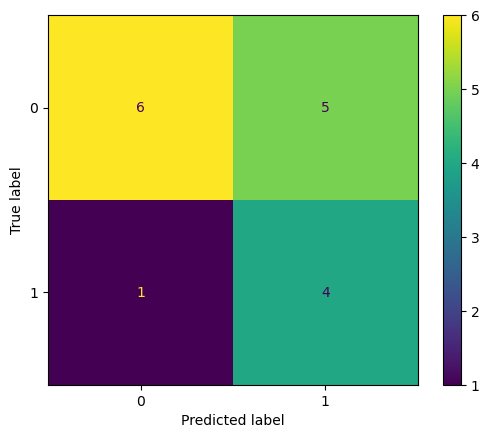

In [304]:
vis = metrics.ConfusionMatrixDisplay(mc)
vis.plot()

In [305]:
#calcula exactitud
metrics.confusion_matrix(y_prec,x_metros)[0][0]
metrics.confusion_matrix(y_prec,x_metros)



array([[6, 5],
       [1, 4]])

In [306]:
#calcula acurrancy
metrics.accuracy_score(y_prec,x_metros)

0.625

In [307]:
# precision
metrics.precision_score(y_prec,x_metros,pos_label="True")

0.4444444444444444

In [308]:
metrics.recall_score(y_prec,x_metros,pos_label="False")

0.5454545454545454